# Corner Detection

Contents:
- Harris Corner Detection

Author: Abijith J Kamath
https://kamath-abhijith.github.io

In [168]:
import numpy as np

from skimage import io
from skimage.transform import rotate
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

## Harris Corner Detection

In [169]:
## FUNCTION DEFINITONS :: HARRIS CORNER DETECTION

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def mean_filter(image, kernel_size=5):
    blur_kernel = np.ones((kernel_size,kernel_size))/(kernel_size)**2

    return signal.convolve2d(image, blur_kernel, mode='same', boundary='fill', fillvalue=0)

def gaussian_filter(image, kernel_size, var):
    m = kernel_size[0]
    n = kernel_size[1]
    gaussian_matrix = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            d = (i-m/2)**2 + (j-n/2)**2
            gaussian_matrix[i,j] = np.exp(-d/(2*var**2))

    return signal.convolve2d(image, gaussian_matrix, mode='same', boundary='fill', fillvalue=0)

def basic_edges(image, denoise=False, mode='sobel'):
    if denoise:
        image = gaussian_filter(image, (5,5), 5)

    if mode == 'sobel':
        kernel_x = np.array([[-1.0, 0.0, 1.0],
                             [-2.0, 0.0, 2.0],
                             [-1.0, 0.0, 1.0]])

        kernel_y = np.array([[-1.0, -2.0, -1.0],
                             [0.0, 0.0, 0.0],
                             [1.0, 2.0, 1.0]])

    elif mode == 'prewitt':
        kernel_x = np.array([[-1.0, 0.0, 1.0],
                             [-1.0, 0.0, 1.0],
                             [-1.0, 0.0, 1.0]])

        kernel_y = np.array([[-1.0, -1.0, -1.0],
                             [0.0, 0.0, 0.0],
                             [1.0, 1.0, 1.0]])

    imgrad_x = signal.convolve2d(image, kernel_x, mode='same', boundary='fill', fillvalue=0)
    imgrad_y = signal.convolve2d(image, kernel_y, mode='same', boundary='fill', fillvalue=0)
    return imgrad_x, imgrad_y

def harris_corner(image, thresh, kernel_size=(5,5), var=5, st_mode='mean', denoise=False):
    image_x, image_y = basic_edges(image, denoise, mode='sobel')
    image_x2 = image_x**2
    image_y2 = image_y**2
    image_xy = image_x*image_y

    if st_mode == 'Gaussian':
        smooth_grad_x = gaussian_filter(image_x2, kernel_size, var)
        smooth_grad_y = gaussian_filter(image_y2, kernel_size, var)
        smooth_grad_xy = gaussian_filter(image_xy, kernel_size, var)
    elif st_mode == 'mean':
        smooth_grad_x = mean_filter(image_x2, kernel_size[0])
        smooth_grad_y = mean_filter(image_y2, kernel_size[0])
        smooth_grad_xy = mean_filter(image_xy, kernel_size[0])

    R_map = smooth_grad_x*smooth_grad_y - smooth_grad_xy**2 - 0.04*(smooth_grad_x + smooth_grad_y)**2

    return (R_map >= thresh)*1.0

In [170]:
## HARRIS CORNER DETECTION

chess = io.imread("chess_board_1.jpg", 0)
chess = rgb2gray(chess)

barbara = io.imread("cameraman.tif", 0)

thresh = 1e4
kernel_size = (3,3)
var = 1
corner_chess = harris_corner(chess, thresh, kernel_size, var)

thresh = 1e9
kernel_size = (3,3)
var = 1
corner_barbara = harris_corner(barbara, thresh, kernel_size, var)

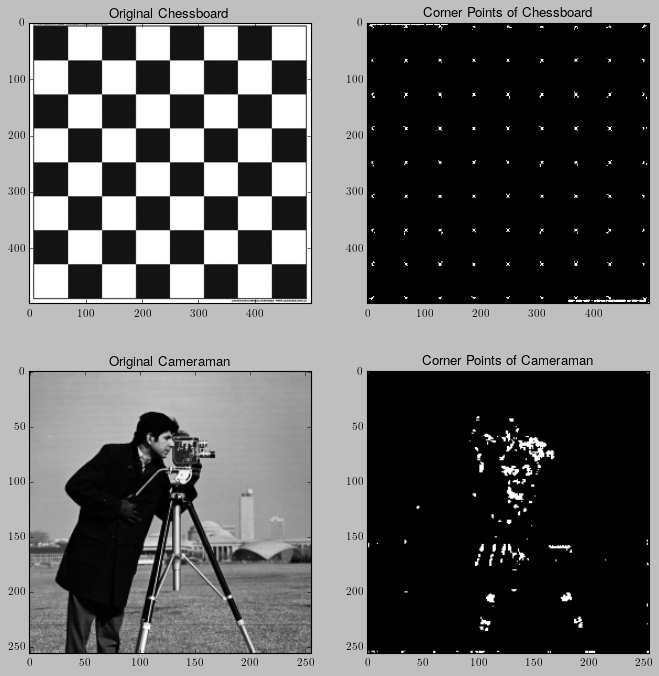

In [171]:
## PLOTS :: HARRIS CORNER
style.use('classic')
rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(2,2,figsize=(10,10))
plts[0][0].imshow(chess, cmap='gray')
plts[0][0].set_title(r"Original Chessboard")

plts[0][1].imshow(corner_chess, cmap='gray')
plts[0][1].set_title(r"Corner Points of Chessboard")

plts[1][0].imshow(barbara, cmap='gray')
plts[1][0].set_title(r"Original Cameraman")

plts[1][1].imshow(corner_barbara, cmap='gray')
plts[1][1].set_title(r"Corner Points of Cameraman")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_5/Answers/figures/harris_corner1.eps', format='eps')
plt.show()

In [172]:
## HARRIS CORNER ON TRANSFORMED IMAGES

# Image rotation
angle = 45
rotate_chess = rotate(chess, angle)
rotate_barbara = rotate(barbara, angle)

thresh = 1e4
kernel_size = (3,3)
var = 1
rotate_chess_corner = harris_corner(rotate_chess, thresh, kernel_size, var)

thresh = 0.1
kernel_size = (3,3)
var = 1
rotate_barbara_corner = harris_corner(rotate_barbara, thresh, kernel_size, var)

# Image scaling
scale = 20
scale_chess = scale + chess
scale_barbara = scale + barbara

thresh = 1e4
kernel_size = (3,3)
var = 1
scale_chess_corner = harris_corner(scale_chess, thresh, kernel_size, var)

thresh = 1e9
kernel_size = (3,3)
var = 1
scale_barbara_corner = harris_corner(scale_barbara, thresh, kernel_size, var)

# Noisy image
noise_level = 5
noisy_chess = chess + noise_level*np.random.rand(chess.shape[0], chess.shape[1])
noisy_barbara = barbara + noise_level*np.random.rand(barbara.shape[0], barbara.shape[1])

thresh = 1e9
kernel_size = (3,3)
var = 1
noisy_chess_corner = harris_corner(noisy_chess, thresh, kernel_size, var, denoise=True)

thresh = 1e11
kernel_size = (3,3)
var = 1
noisy_barbara_corner = harris_corner(noisy_barbara, thresh, kernel_size, var, denoise=True)

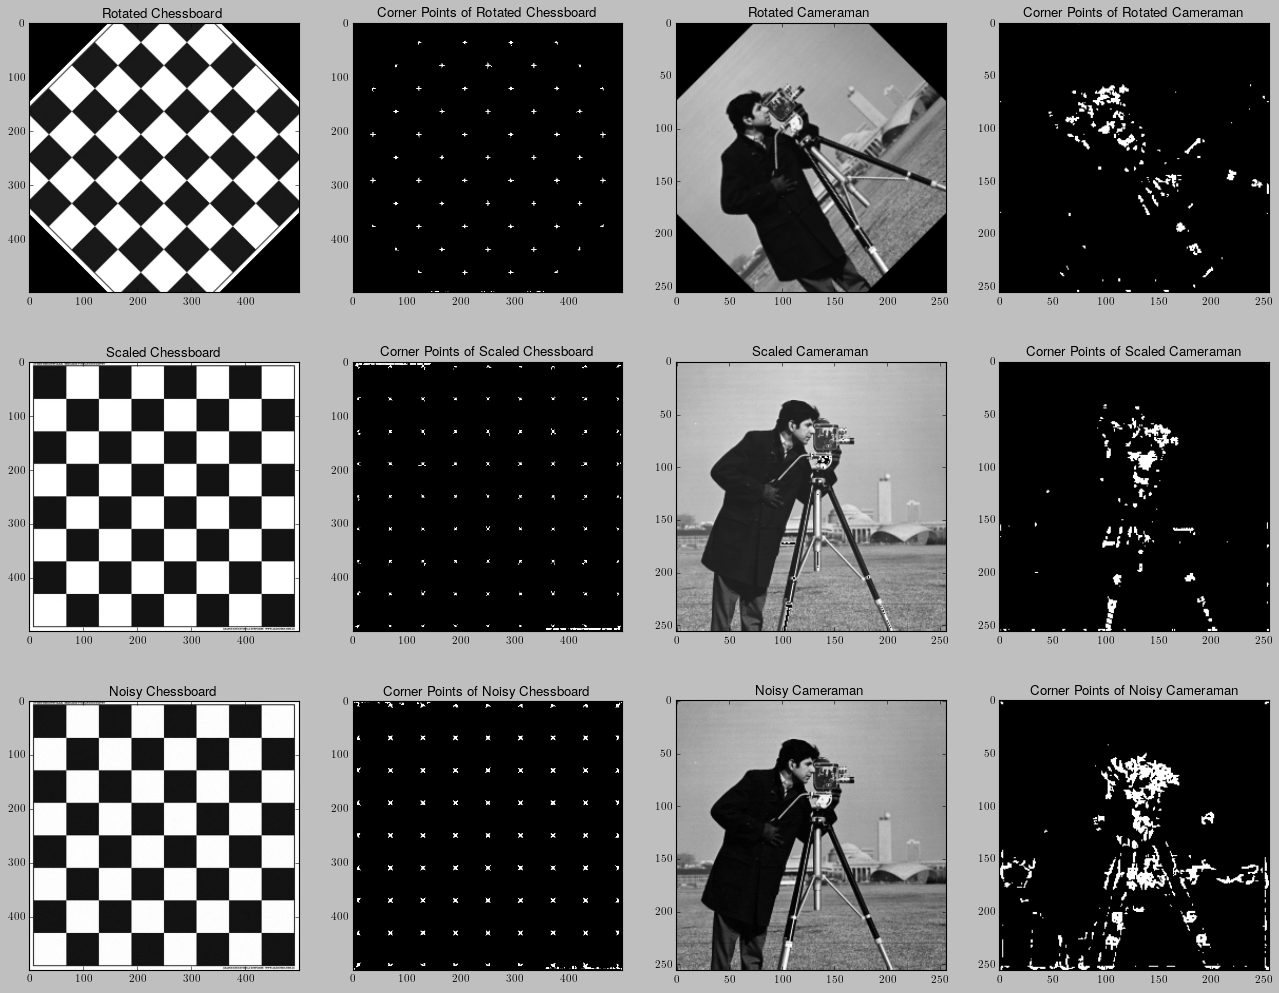

In [173]:
## PLOTS :: HARRIS CORNER

fig, plts = plt.subplots(3,4,figsize=(20,15))
plts[0][0].imshow(rotate_chess, cmap='gray')
plts[0][0].set_title(r"Rotated Chessboard")

plts[0][1].imshow(rotate_chess_corner, cmap='gray')
plts[0][1].set_title(r"Corner Points of Rotated Chessboard")

plts[0][2].imshow(rotate_barbara, cmap='gray')
plts[0][2].set_title(r"Rotated Cameraman")

plts[0][3].imshow(rotate_barbara_corner, cmap='gray')
plts[0][3].set_title(r"Corner Points of Rotated Cameraman")

plts[1][0].imshow(scale_chess, cmap='gray')
plts[1][0].set_title(r"Scaled Chessboard")

plts[1][1].imshow(scale_chess_corner, cmap='gray')
plts[1][1].set_title(r"Corner Points of Scaled Chessboard")

plts[1][2].imshow(scale_barbara, cmap='gray')
plts[1][2].set_title(r"Scaled Cameraman")

plts[1][3].imshow(scale_barbara_corner, cmap='gray')
plts[1][3].set_title(r"Corner Points of Scaled Cameraman")

plts[2][0].imshow(noisy_chess, cmap='gray')
plts[2][0].set_title(r"Noisy Chessboard")

plts[2][1].imshow(noisy_chess_corner, cmap='gray')
plts[2][1].set_title(r"Corner Points of Noisy Chessboard")

plts[2][2].imshow(noisy_barbara, cmap='gray')
plts[2][2].set_title(r"Noisy Cameraman")

plts[2][3].imshow(noisy_barbara_corner, cmap='gray')
plts[2][3].set_title(r"Corner Points of Noisy Cameraman")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_5/Answers/figures/harris_corner2.eps', format='eps')
plt.show()